In [59]:
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans


mall = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_learning/Machine_learning_pracs/Clustering/Clustering/Mall_Customers.csv")
mall.head()
mall = mall.rename(columns = {"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":"Spending_Score"})
mall.head()
mall.tail()
mall.info()
mall.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall.isnull().any()

,0
CustomerID,False
Genre,False
Age,False
Annual_Income,False
Spending_Score,False


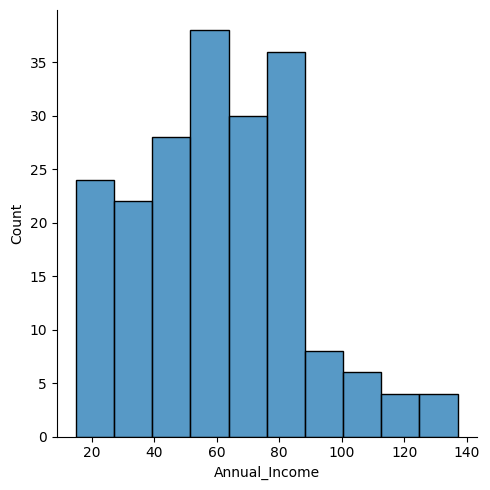

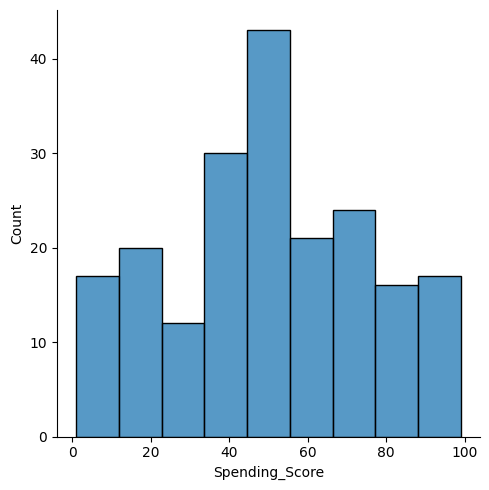

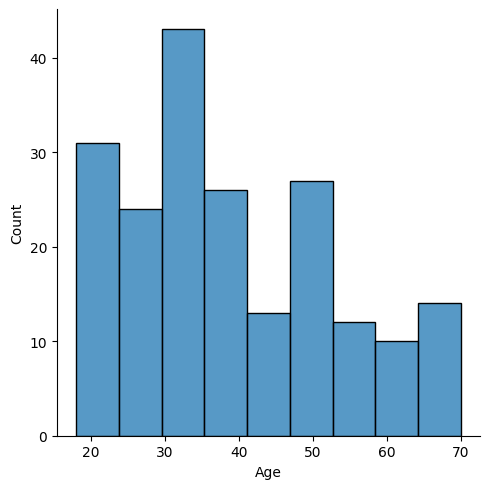

In [ ]:
sns.displot(mall["Annual_Income"])
mpl.show()
sns.displot(mall["Spending_Score"])
mpl.show()
sns.displot(mall['Age'])
mpl.show()

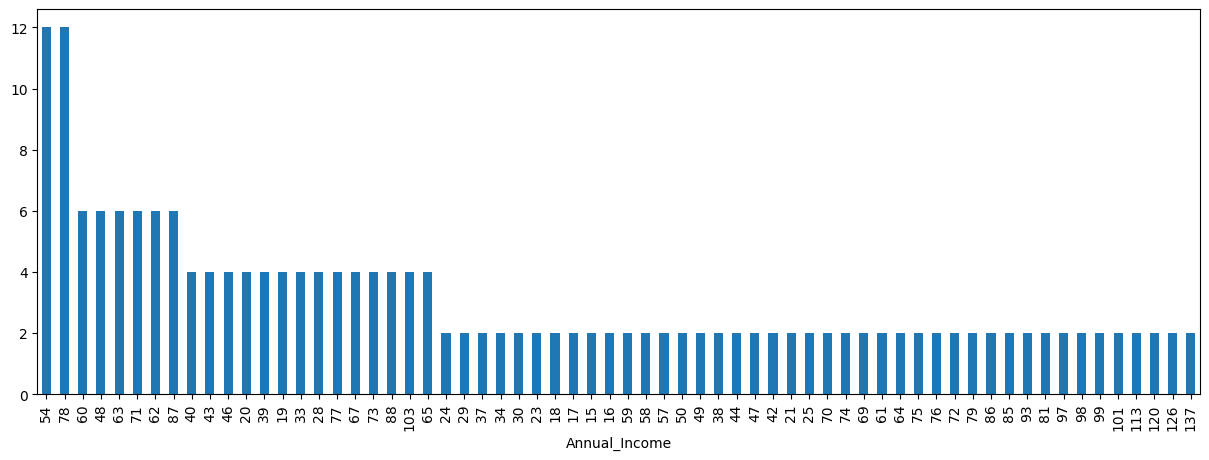

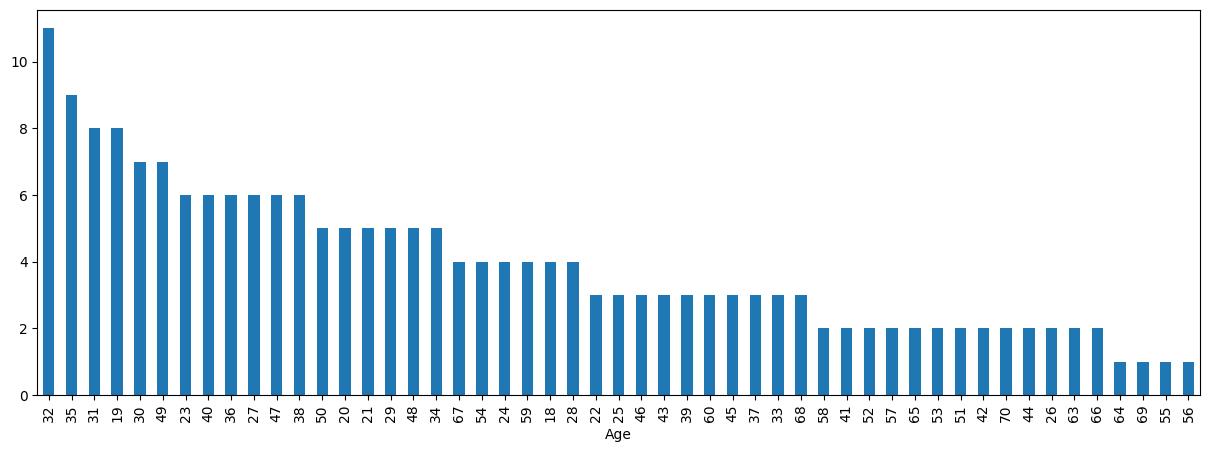

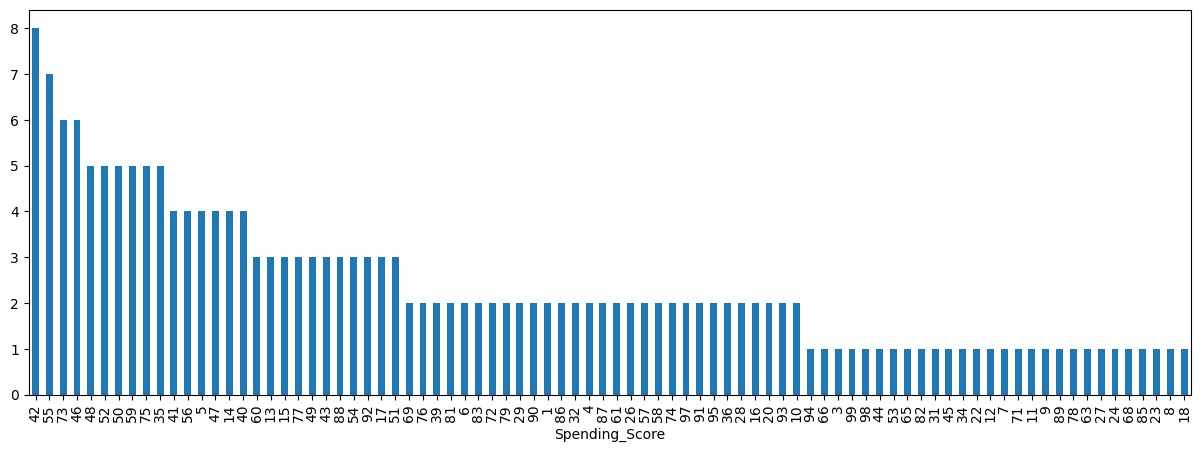

In [ ]:
mall['Annual_Income'].value_counts().plot.bar(figsize = (15,5))
mpl.show()
mall['Age'].value_counts().plot.bar(figsize = (15,5))
mpl.show()
mall['Spending_Score'].value_counts().plot.bar(figsize = (15,5))
mpl.show()


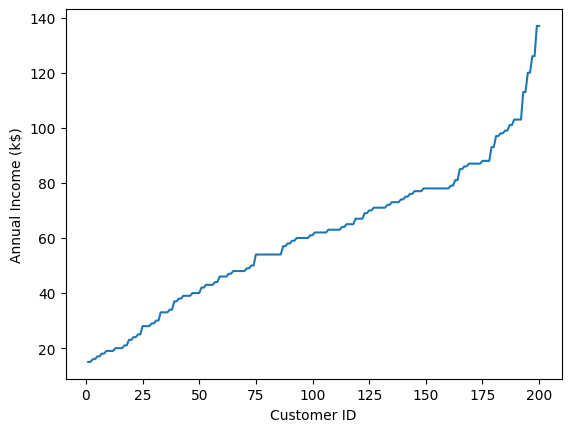

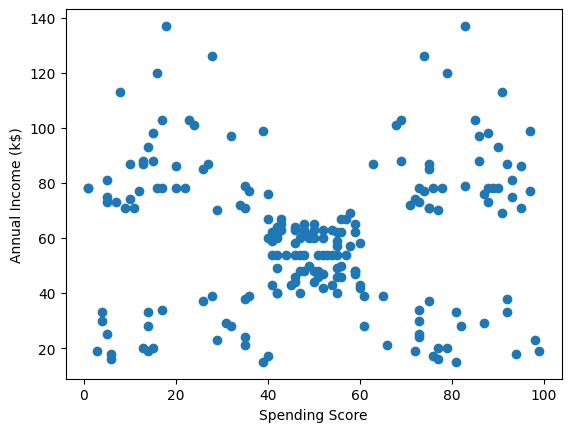

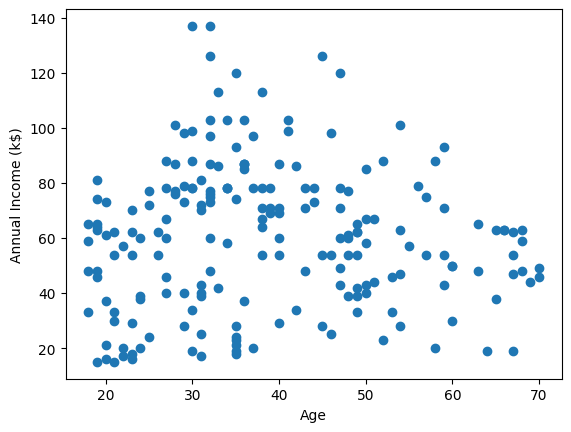

In [58]:
mpl.plot(mall['CustomerID'],mall['Annual_Income'])
mpl.xlabel('Customer ID')
mpl.ylabel('Annual Income (k$)')
mpl.show()

mpl.scatter(mall['Spending_Score'],mall['Annual_Income'])
mpl.xlabel('Spending Score')
mpl.ylabel('Annual Income (k$)')
mpl.show()

mpl.scatter(mall['Age'],mall['Annual_Income'])
mpl.xlabel('Age')
mpl.ylabel('Annual Income (k$)')
mpl.show()

#Clustering starts here

In [40]:
mall_nums = mall.drop(['CustomerID','Gender'], axis = 1)
mall_nums.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


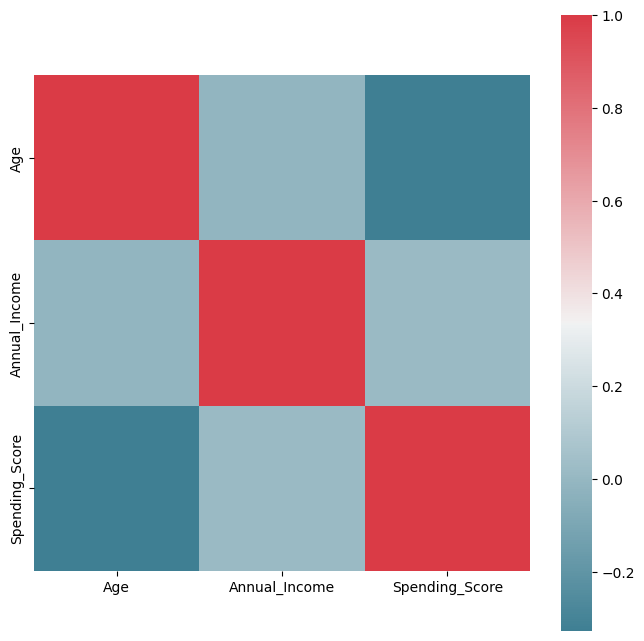

In [44]:
## start with heat map (Gaussian)

mpl.figure(figsize = (8,8))
mall_nums_c = mall_nums.corr()
sns.heatmap(mall_nums_c, mask = np.zeros_like(mall_nums_c, dtype = np.bool), cmap = sns.diverging_palette(220,10, as_cmap = True), square=True)
mpl.show()

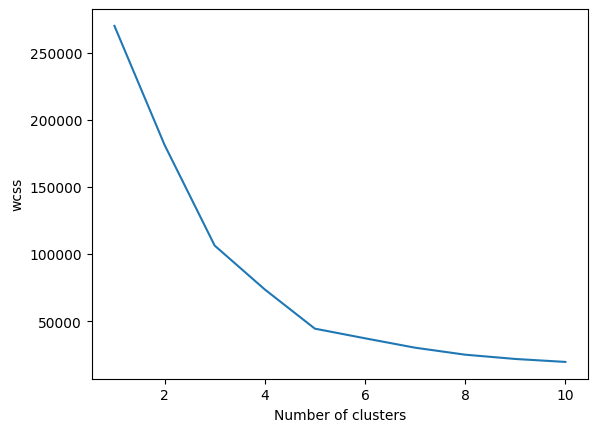

In [68]:
## Kmeans
## elbow method

x = mall.iloc[:, [3,4]].values
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter= 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

mpl.plot(range(1,11), wcss)
mpl.xlabel('Number of clusters')
mpl.ylabel('wcss')
mpl.show()



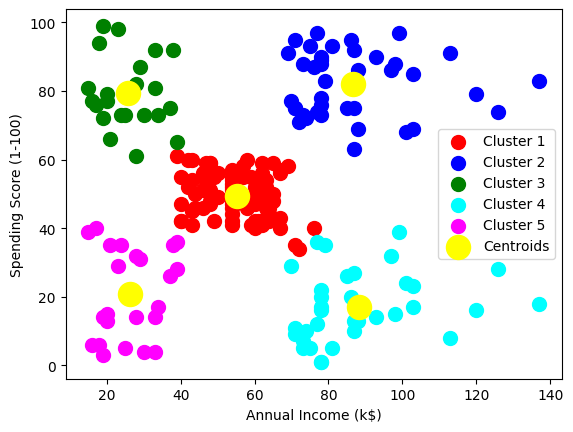

In [74]:
## training the model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

mpl.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
mpl.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
mpl.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
mpl.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
mpl.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
mpl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
mpl.xlabel('Annual Income (k$)')
mpl.ylabel('Spending Score (1-100)')
mpl.legend()
mpl.show()

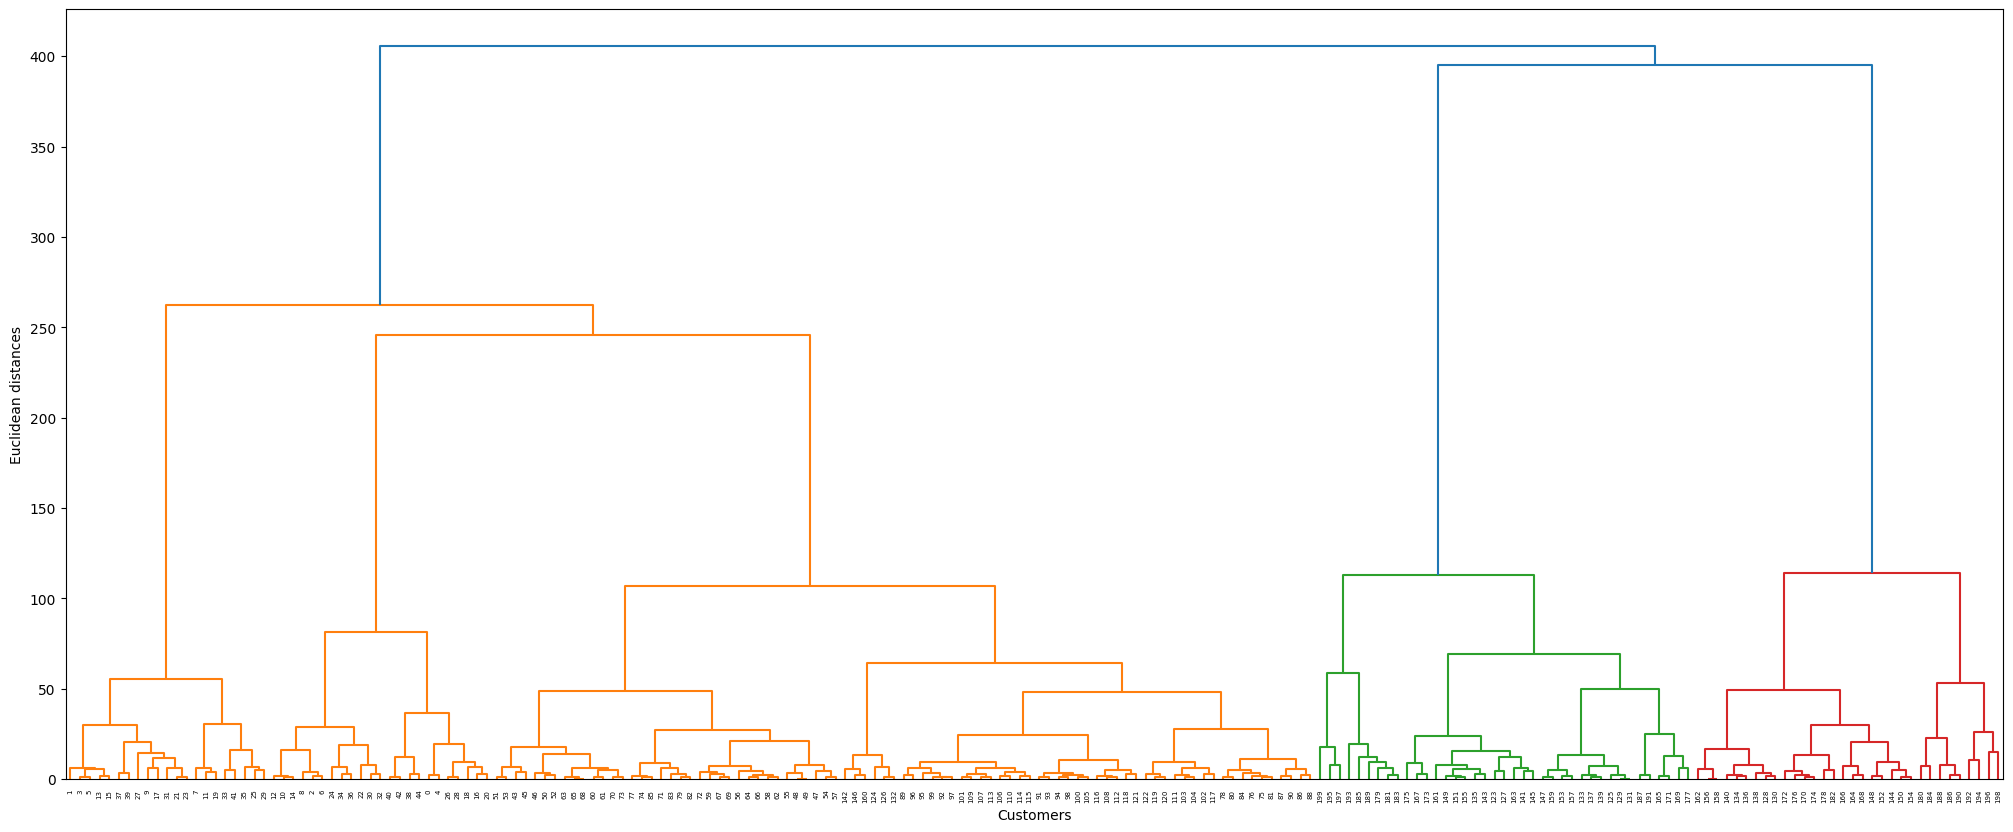

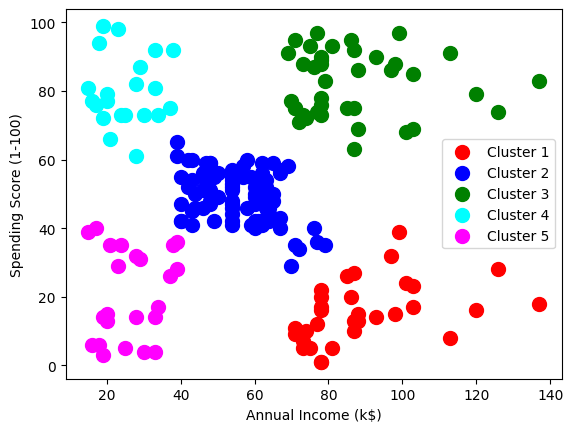

In [86]:
## looking at softer clustering methods of hierarchical

X = mall.iloc[:, [3, 4]].values

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
mpl.figure(figsize=(25, 10))
mpl.xticks(rotation=90, fontsize = 50)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) ## this is the ward linkage method - minimises variance within a cluster
mpl.xlabel('Customers')
mpl.ylabel('Euclidean distances')
mpl.show() ## creates a tree

# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward') #affinity denotes the distance method used, it is not here as EUC is used and that is the default
y_hc = hc.fit_predict(X) ## fits the model to the data x and stores them as a variable

# Visualising the clusters
mpl.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1') ### s is size of points, c is colour
mpl.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
mpl.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
mpl.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
mpl.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
mpl.xlabel('Annual Income (k$)')
mpl.ylabel('Spending Score (1-100)')
mpl.legend()
mpl.show()